# Data Cleaning


In this lesson we will learn the basics of Data Cleaning and the Exploratory Data Analysis Pipeline.

<img src='figures/data_cleaning.png' width=300>

## Introduction
This is a **comprehensive EDA technique with python**.

It is clear that everyone in this community is familiar with Meta Kaggle and kaggle survey 2018 datasets but if you need to review your information about the datasets please visit  [meta-kaggle](https://www.kaggle.com/kaggle/meta-kaggle) and [kaggle survey 2018](https://www.kaggle.com/kaggle/kaggle-survey-2018).

## Loading Packages
In this kernel we are using the following packages:

 <img src="figures/packages.png" width=300>
 Now we import all of them 

In [1]:
# Now import the libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud as wc
from nltk.corpus import stopwords
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from pandas import get_dummies
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import string
import scipy
import numpy
import nltk
import json
import sys
import csv
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
print('matplotlib: {}'.format(matplotlib.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('scipy: {}'.format(scipy.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))
#print('wordcloud: {}'.format(wordcloud.version))

matplotlib: 3.0.3
sklearn: 0.20.3
scipy: 1.2.1
seaborn: 0.9.0
pandas: 0.24.2
numpy: 1.16.2
Python: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]


A few tiny adjustments for better **code readability**

In [3]:
sns.set(style='white', context='notebook', palette='deep')
pylab.rcParams['figure.figsize'] = 12,8
warnings.filterwarnings('ignore')
mpl.style.use('ggplot')
sns.set_style('white')
%matplotlib inline

## 3- Exploratory Data Analysis (EDA)
In this section, you'll learn how to use graphical and numerical techniques to begin uncovering the structure of your data. 
 
* Which variables suggest interesting relationships?
* Which observations are unusual?

By the end of the section, you'll be able to answer these questions and more, while generating graphics that are both insightful and beautiful.  then We will review analytical and statistical operations:

1. Data Collection
1. Visualization
1. Data Cleaning
1. Data Preprocessing

<img src="figures/EDA.png" width=350>

## Data Collection
**Data collection** is the process of gathering and measuring data.
<img src='figures/data-collection.jpg' width=300>

I start Collection Data by the Users and Kernels datasets into **Pandas DataFrames**

In [4]:
# import kernels and users to play with it
users = pd.read_csv("data/kaggle_Users.csv")
kernels = pd.read_csv("data/kaggle_Kernels.csv")
messages = pd.read_csv("data/kaggle_ForumMessages.csv")
freeFormResponses=pd.read_csv("data/kaggle_freeFormResponses.csv")
multipleChoiceResponses=pd.read_csv("data/kaggle_multipleChoiceResponses.csv")

**Note 1**

* Each row is an observation (also known as : sample, example, instance, record)
* Each column is a feature (also known as: Predictor, attribute, Independent Variable, input, regressor, Covariate)

In [5]:
users.sample(1) 

,Id,UserName,DisplayName,RegisterDate,PerformanceTier
2717974,2932504,cupkaifei,Habbcs,03/13/2019,0


In [6]:
kernels.sample(1) 

,Id,AuthorUserId,CurrentKernelVersionId,ForkParentKernelVersionId,ForumTopicId,FirstKernelVersionId,CreationDate,EvaluationDate,MadePublicDate,IsProjectLanguageTemplate,CurrentUrlSlug,Medal,MedalAwardDate,TotalViews,TotalComments,TotalVotes
144469,400111,876835,1632993.0,NaN,NaN,1632993.0,10/20/2017 01:39:19,10/20/2017,10/20/2017,False,my-solution-2nd-part-vii-2nd-xgboost-with-bug,NaN,NaN,220,0,1


In [7]:
freeFormResponses.sample(1) 

,Q11_OTHER_TEXT,Q12_OTHER_TEXT,Q12_Part_1_TEXT,Q12_Part_2_TEXT,Q12_Part_3_TEXT,Q12_Part_4_TEXT,Q12_Part_5_TEXT,Q13_OTHER_TEXT,Q14_OTHER_TEXT,Q15_OTHER_TEXT,...,Q34_OTHER_TEXT,Q35_OTHER_TEXT,Q36_OTHER_TEXT,Q37_OTHER_TEXT,Q38_OTHER_TEXT,Q42_OTHER_TEXT,Q49_OTHER_TEXT,Q50_OTHER_TEXT,Q6_OTHER_TEXT,Q7_OTHER_TEXT
23693,NaN,NaN,NaN,NaN,NaN,NaN,"Rstudio,Azure",NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
multipleChoiceResponses.sample(1) 

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
15567,642,Female,-1,40-44,United States of America,Some college/university study without earning ...,Fine arts or performing arts,Consultant,-1,Computers/Technology,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


Select a random userid from the dataset to use for the experiment.

In [9]:
username="mjbahmani"
userid=int(users[users['UserName']=="mjbahmani"].Id)
userid

1840354

## Features
Features can be from following types:
1. numeric
1. categorical
1. ordinal
1. datetime
1. coordinates

Find the type of features in **Meta Kaggle**?!
<br>
for getting some information about the dataset you can use **info()** command

In [10]:
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023625 entries, 0 to 3023624
Data columns (total 5 columns):
Id                 int64
UserName           object
DisplayName        object
RegisterDate       object
PerformanceTier    int64
dtypes: int64(2), object(3)
memory usage: 115.3+ MB
None


In [11]:
print(freeFormResponses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23860 entries, 0 to 23859
Data columns (total 35 columns):
Q11_OTHER_TEXT     545 non-null object
Q12_OTHER_TEXT     1765 non-null object
Q12_Part_1_TEXT    3928 non-null object
Q12_Part_2_TEXT    1448 non-null object
Q12_Part_3_TEXT    1134 non-null object
Q12_Part_4_TEXT    9553 non-null object
Q12_Part_5_TEXT    1353 non-null object
Q13_OTHER_TEXT     1193 non-null object
Q14_OTHER_TEXT     502 non-null object
Q15_OTHER_TEXT     588 non-null object
Q16_OTHER_TEXT     597 non-null object
Q17_OTHER_TEXT     114 non-null object
Q18_OTHER_TEXT     162 non-null object
Q19_OTHER_TEXT     451 non-null object
Q1_OTHER_TEXT      80 non-null object
Q20_OTHER_TEXT     94 non-null object
Q21_OTHER_TEXT     493 non-null object
Q22_OTHER_TEXT     95 non-null object
Q27_OTHER_TEXT     308 non-null object
Q28_OTHER_TEXT     187 non-null object
Q29_OTHER_TEXT     532 non-null object
Q30_OTHER_TEXT     203 non-null object
Q31_OTHER_TEXT     235 non-nu

## Explore the Dataset
1- Dimensions of the dataset.

2- Peek at the data itself.

3- Statistical summary of all attributes.

4- Breakdown of the data by the class variable.

Don’t worry, each look at the data is **one command**. These are useful commands that you can use again and again on future projects.

In [12]:
# shape
print(users.shape)

(3023625, 5)


In [13]:
# shape
print(kernels.shape)

(241956, 16)


In [14]:
print(freeFormResponses.shape)

(23860, 35)


In [15]:
#columns*rows
users.size

15118125

In [16]:
#columns*rows
kernels.size

3871296


We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.
To grab information about the dataset you can use **info()** command

In [17]:
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023625 entries, 0 to 3023624
Data columns (total 5 columns):
Id                 int64
UserName           object
DisplayName        object
RegisterDate       object
PerformanceTier    int64
dtypes: int64(2), object(3)
memory usage: 115.3+ MB
None


In [18]:
print(kernels.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241956 entries, 0 to 241955
Data columns (total 16 columns):
Id                           241956 non-null int64
AuthorUserId                 241956 non-null int64
CurrentKernelVersionId       204413 non-null float64
ForkParentKernelVersionId    71347 non-null float64
ForumTopicId                 22255 non-null float64
FirstKernelVersionId         240318 non-null float64
CreationDate                 241764 non-null object
EvaluationDate               208703 non-null object
MadePublicDate               227063 non-null object
IsProjectLanguageTemplate    241956 non-null bool
CurrentUrlSlug               241954 non-null object
Medal                        10444 non-null float64
MedalAwardDate               10444 non-null object
TotalViews                   241956 non-null int64
TotalComments                241956 non-null int64
TotalVotes                   241956 non-null int64
dtypes: bool(1), float64(5), int64(5), object(5)
memory usage: 

Check the number of unique items for Species:

In [19]:
kernels['Medal'].unique()

array([nan,  3.,  2.,  1.])

In [20]:
kernels["Medal"].value_counts()


3.0    7575
2.0    1877
1.0     992
Name: Medal, dtype: int64

Check the first 5 rows of the data set:

In [21]:
kernels.head(5) 

,Id,AuthorUserId,CurrentKernelVersionId,ForkParentKernelVersionId,ForumTopicId,FirstKernelVersionId,CreationDate,EvaluationDate,MadePublicDate,IsProjectLanguageTemplate,CurrentUrlSlug,Medal,MedalAwardDate,TotalViews,TotalComments,TotalVotes
0,1,2505,205.0,NaN,NaN,1.0,03/25/2015 18:25:32,03/23/2018,03/25/2015,False,hello,NaN,NaN,44,0,0
1,2,3716,1748.0,NaN,26670.0,2.0,03/25/2015 18:31:07,04/16/2015,03/25/2015,False,rf-proximity,3.0,07/15/2016,7706,1,13
2,4,3716,41.0,NaN,NaN,9.0,03/25/2015 21:57:36,03/23/2018,03/25/2015,False,r-version,NaN,NaN,20,0,0
3,5,28963,19.0,NaN,NaN,13.0,03/25/2015 22:01:04,03/23/2018,03/25/2015,False,test1,NaN,NaN,25,0,0
4,6,3716,21.0,NaN,NaN,15.0,03/25/2015 22:19:00,03/23/2018,03/25/2015,False,are-icons-missing,NaN,NaN,16,0,0


Check the last 5 rows of the data set:

In [22]:
users.tail() 

,Id,UserName,DisplayName,RegisterDate,PerformanceTier
3023620,3267210,doodslag,doodslag,05/24/2019,0
3023621,3267211,sdfffds,Aaa AAA,05/24/2019,0
3023622,3267212,chinnoppanat,chineiei,05/24/2019,0
3023623,3267213,kameel2311,Kameel Amareen,05/24/2019,0
3023624,3267214,aaa203719,Dmitry,05/24/2019,0


Check 5 random rows from the data set:

In [23]:
kernels.sample(5) 

,Id,AuthorUserId,CurrentKernelVersionId,ForkParentKernelVersionId,ForumTopicId,FirstKernelVersionId,CreationDate,EvaluationDate,MadePublicDate,IsProjectLanguageTemplate,CurrentUrlSlug,Medal,MedalAwardDate,TotalViews,TotalComments,TotalVotes
33920,64774,618188,NaN,NaN,NaN,241999.0,05/19/2016 23:07:27,NaN,05/19/2016,False,notebook-7970925ca8e639561f9a,NaN,NaN,15,0,0
139184,309834,931613,1339344.0,NaN,NaN,1338640.0,07/13/2017 14:40:00,07/13/2017,07/13/2017,False,basic-logistic-regression-cc-fraud-70-rate,NaN,NaN,117,0,1
8829,26024,442283,114131.0,109264.0,NaN,111946.0,11/26/2015 23:45:17,11/30/2015,11/26/2015,False,test1,NaN,NaN,113,0,0
62596,107709,993,404810.0,NaN,NaN,404810.0,10/19/2016 19:26:36,10/19/2016,10/19/2016,False,notebook6163dc949c,NaN,NaN,14,0,0
86422,158624,863928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,assignment1-1,NaN,NaN,0,0,0


Statistical summary about the dataset:

In [24]:
kernels.describe() 

,Id,AuthorUserId,CurrentKernelVersionId,ForkParentKernelVersionId,ForumTopicId,FirstKernelVersionId,Medal,TotalViews,TotalComments,TotalVotes
count,2.419560e+05,2.419560e+05,2.044130e+05,7.134700e+04,22255.000000,2.403180e+05,10444.000000,2.419560e+05,241956.000000,241956.000000
mean,8.503644e+05,9.878120e+05,3.632660e+06,2.141650e+06,54921.843586,3.102508e+06,2.630314,3.838757e+02,0.623394,2.364579
std,1.091341e+06,7.233939e+05,4.087210e+06,2.836515e+06,21952.199456,3.879372e+06,0.650403,5.514403e+03,6.575731,28.192972
min,1.000000e+00,3.680000e+02,1.900000e+01,1.000000e+00,14433.000000,1.000000e+00,1.000000,0.000000e+00,0.000000,0.000000
25%,1.044458e+05,4.621950e+05,6.421520e+05,3.265290e+05,35837.500000,3.902452e+05,2.000000,1.700000e+01,0.000000,0.000000
50%,2.384515e+05,7.758730e+05,1.235206e+06,8.064090e+05,55612.000000,1.088644e+06,3.000000,3.400000e+01,0.000000,0.000000
75%,1.407120e+06,1.383222e+06,5.906639e+06,2.983186e+06,73565.000000,4.937430e+06,3.000000,1.170000e+02,0.000000,0.000000
max,4.011726e+06,3.265550e+06,1.462577e+07,1.461933e+07,93213.000000,1.462431e+07,3.000000,2.090103e+06,935.000000,4430.000000


## Data Cleaning
When dealing with real-world data, dirty data is the norm rather than the exception. 
We continuously need to predict correct values, inspite of missing ones, and find links between various data artefacts such as schemas and records. 
We need to stop treating data cleaning as a piecemeal exercise (resolving different types of errors in isolation), and instead leverage all signals and resources (such as constraints, available statistics, and dictionaries) to accurately predict corrective actions.

<img src='figures/Data_Cleansing_Cycle.png' height=300>

The primary goal of data cleaning is to detect and remove errors and **anomalies** to increase the value of data in analytics and decision making. 
While it has been the focus of many researchers for several years, individual problems have been addressed separately. 
These include missing value correction, outliers detection, transformations, integrity constraints violations detection and repair, consistent query answering, deduplication, and many other related problems such as profiling and constraints mining.

Check how many nulls are on the dataset:

In [25]:
#How many NA elements in every column
users.isnull().sum()

Id                   0
UserName             1
DisplayName        128
RegisterDate         0
PerformanceTier      0
dtype: int64

In [26]:
kernels.isnull().sum()

Id                                0
AuthorUserId                      0
CurrentKernelVersionId        37543
ForkParentKernelVersionId    170609
ForumTopicId                 219701
FirstKernelVersionId           1638
CreationDate                    192
EvaluationDate                33253
MadePublicDate                14893
IsProjectLanguageTemplate         0
CurrentUrlSlug                    2
Medal                        231512
MedalAwardDate               231512
TotalViews                        0
TotalComments                     0
TotalVotes                        0
dtype: int64

In [27]:
kernels.groupby('Medal').count()

,Id,AuthorUserId,CurrentKernelVersionId,ForkParentKernelVersionId,ForumTopicId,FirstKernelVersionId,CreationDate,EvaluationDate,MadePublicDate,IsProjectLanguageTemplate,CurrentUrlSlug,MedalAwardDate,TotalViews,TotalComments,TotalVotes
Medal,,,,,,,,,,,,,,,
1.0,992,992,992,121,991,992,992,992,991,992,992,992,992,992,992
2.0,1877,1877,1877,264,1841,1876,1877,1877,1877,1877,1877,1877,1877,1877,1877
3.0,7575,7575,7568,984,6150,7575,7575,7573,7562,7575,7575,7575,7575,7575,7575


Print dataset **columns**

In [28]:
kernels.columns

Index(['Id', 'AuthorUserId', 'CurrentKernelVersionId',
       'ForkParentKernelVersionId', 'ForumTopicId', 'FirstKernelVersionId',
       'CreationDate', 'EvaluationDate', 'MadePublicDate',
       'IsProjectLanguageTemplate', 'CurrentUrlSlug', 'Medal',
       'MedalAwardDate', 'TotalViews', 'TotalComments', 'TotalVotes'],
      dtype='object')

In [29]:
users.columns

Index(['Id', 'UserName', 'DisplayName', 'RegisterDate', 'PerformanceTier'], dtype='object')

**Note**
in Pandas you can perform queries like "where"

## Find yourself in Users dataset

In [30]:
users[users['Id']==userid]

,Id,UserName,DisplayName,RegisterDate,PerformanceTier
1680173,1840354,mjbahmani,MJ Bahmani,04/20/2018,4


## Find your kernels in Kernels dataset

In [31]:
yourkernels=kernels[kernels['AuthorUserId']==userid]
yourkernels

,Id,AuthorUserId,CurrentKernelVersionId,ForkParentKernelVersionId,ForumTopicId,FirstKernelVersionId,CreationDate,EvaluationDate,MadePublicDate,IsProjectLanguageTemplate,CurrentUrlSlug,Medal,MedalAwardDate,TotalViews,TotalComments,TotalVotes
187155,1594170,1840354,10604276.0,NaN,66867.0,5559571.0,09/07/2018 07:43:29,02/16/2019,09/25/2018,False,a-comprehensive-ml-workflow-with-python,1.0,10/13/2018,44579,271,842
192882,1778622,1840354,9589450.0,NaN,68065.0,6312298.0,10/02/2018 13:20:23,01/16/2019,10/09/2018,False,10-steps-to-become-a-data-scientist,1.0,11/15/2018,22788,131,485
193406,1791166,1840354,9252125.0,6153549.0,67864.0,6248131.0,10/04/2018 03:10:02,01/06/2019,10/06/2018,False,ds-workflow-for-hp-10-ml-algorithms-12-plot,1.0,04/17/2019,15310,72,195
194048,1808203,1840354,10849843.0,NaN,67862.0,6247406.0,10/06/2018 12:31:03,02/24/2019,10/06/2018,False,linear-algebra-for-data-scientists,1.0,11/21/2018,23388,50,339
195581,1847773,1840354,10851194.0,NaN,68412.0,6412791.0,10/11/2018 09:26:49,02/24/2019,10/12/2018,False,top-5-deep-learning-frameworks-tutorial,1.0,12/05/2018,11438,46,175
196845,1875944,1840354,10822188.0,NaN,68625.0,6496124.0,10/15/2018 09:48:31,02/23/2019,10/15/2018,False,the-data-scientist-s-toolbox-tutorial-2,1.0,12/31/2018,14088,49,210
197403,1890271,1840354,10849027.0,NaN,68827.0,6552283.0,10/17/2018 06:15:22,02/24/2019,10/17/2018,False,the-data-scientist-s-toolbox-tutorial-1,1.0,11/15/2018,38103,127,598
197922,1903816,1840354,10812811.0,NaN,69114.0,6605349.0,10/18/2018 21:48:53,02/23/2019,10/19/2018,False,20-ml-algorithms-15-plot-for-beginners,1.0,12/17/2018,14331,69,272
198427,1919205,1840354,10851880.0,NaN,69251.0,6678798.0,10/21/2018 10:18:38,02/24/2019,10/21/2018,False,top-5-data-visualization-libraries-tutorial,1.0,01/27/2019,8656,46,123
200523,2000640,1840354,11222097.0,NaN,70330.0,6998053.0,11/01/2018 08:05:02,03/06/2019,11/01/2018,False,tutorial-on-ensemble-learning-don-t-overfit,1.0,03/07/2019,14912,44,188


## Data Preprocessing
**Data preprocessing** refers to the transformations applied to our data before feeding it to the algorithm.
 
Data Preprocessing is a technique that is used to convert the raw data into a clean data set. In other words, whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis.
there are plenty of steps for data preprocessing and we just listed some of them in general (not just for Quora) :
* removing Target column (id)
* Sampling (without replacement)
* Making part of iris unbalanced and balancing (with undersampling and SMOTE)
* Introducing missing values and treating them (replacing by average values)
* Noise filtering
* Data discretization
* Normalization and standardization
* PCA analysis
* Feature selection (filter, embedded, wrapper)

**Note**
Preprocessing and generation pipelines depend on a model type.

Visualization
**Data visualization**  is the presentation of data in a graphical format. 
It enables decision makers to "see" analytics presented visually, so they can grasp difficult concepts or identify new patterns.

With interactive visualization, you can take the concept a step further by using technology to drill down into charts and graphs for more detail, interactively changing what data you see and how it’s processed.

In this section we will look at  **11 plots** with **matplotlib** and **seaborn**
 <img src="figures/visualization.jpg" width=350>


## Scatter plot

Scatter plot Purpose To identify the type of relationship (if any) between two quantitative variables

In [32]:
yourkernels.columns

Index(['Id', 'AuthorUserId', 'CurrentKernelVersionId',
       'ForkParentKernelVersionId', 'ForumTopicId', 'FirstKernelVersionId',
       'CreationDate', 'EvaluationDate', 'MadePublicDate',
       'IsProjectLanguageTemplate', 'CurrentUrlSlug', 'Medal',
       'MedalAwardDate', 'TotalViews', 'TotalComments', 'TotalVotes'],
      dtype='object')

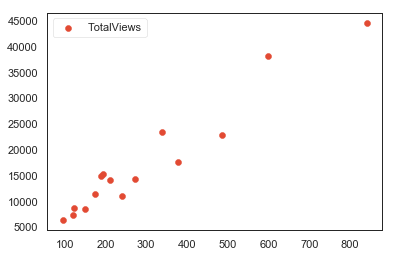

In [33]:
# Modify the graph above by assigning each species an individual color.
x=yourkernels["TotalVotes"]
y=yourkernels["TotalViews"]
plt.scatter(x, y)
plt.legend()
plt.show()


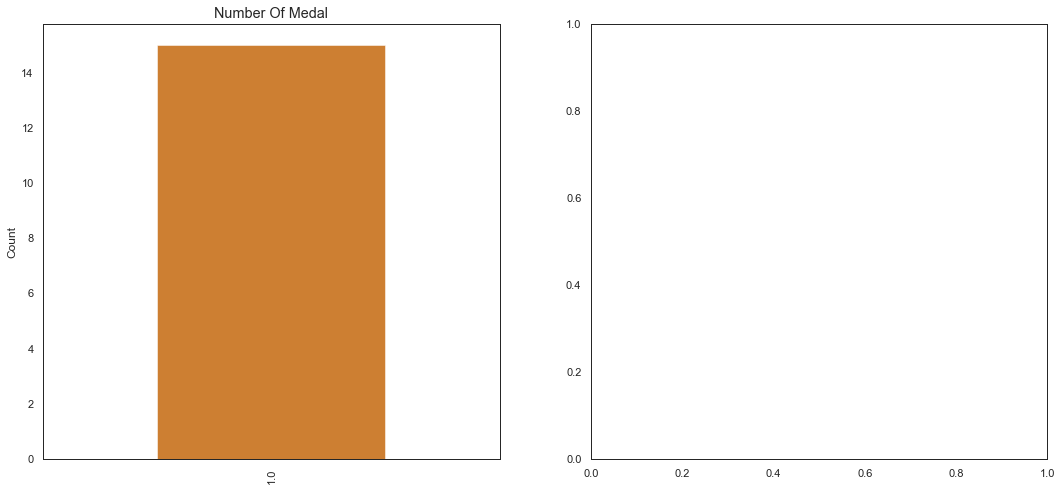

In [34]:
f,ax=plt.subplots(1,2,figsize=(18,8))
yourkernels['Medal'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Medal')
ax[0].set_ylabel('Count')
plt.show()

### Box
In descriptive statistics, a **box plot** or boxplot is a method for graphically depicting groups of numerical data through their quartiles. 
Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram.

<Figure size 432x288 with 0 Axes>

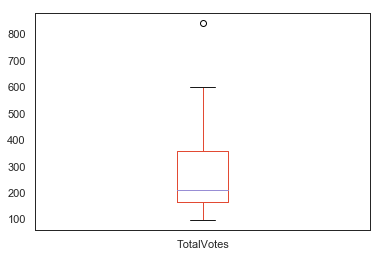

<Figure size 432x288 with 0 Axes>

In [35]:
yourkernels["TotalVotes"].plot(kind='box')
plt.figure()
#This gives us a much clearer idea of the distribution of the input attributes:



<Figure size 432x288 with 0 Axes>

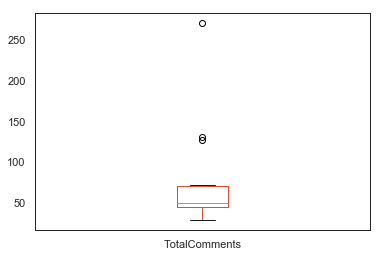

<Figure size 432x288 with 0 Axes>

In [36]:
yourkernels["TotalComments"].plot(kind='box')
plt.figure()


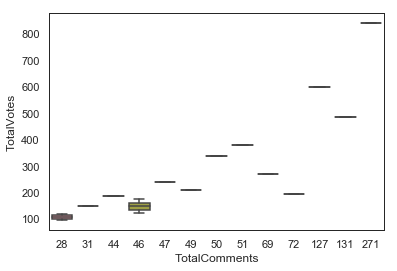

In [37]:
# To plot the species data using a box plot:

sns.boxplot(x="TotalComments", y="TotalVotes", data=yourkernels )
plt.show()

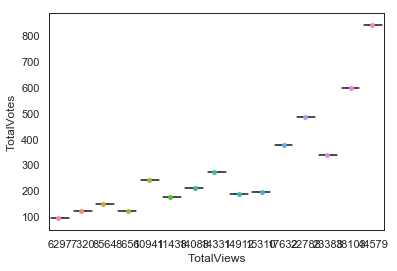

In [38]:
# Use Seaborn's striplot to add data points on top of the box plot 
# Insert jitter=True so that the data points remain scattered and not piled into a verticle line.
# Assign ax to each axis, so that each plot is ontop of the previous axis. 

ax= sns.boxplot(x="TotalViews", y="TotalVotes", data=yourkernels)
ax= sns.stripplot(x="TotalViews", y="TotalVotes", data=yourkernels, jitter=True, edgecolor="gray")
plt.show()

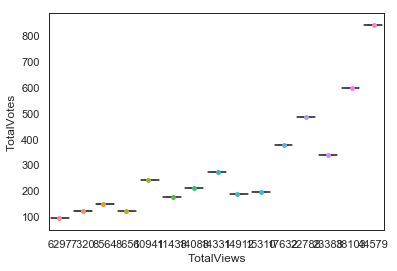

In [39]:
# Tweek the plot above to change fill and border color color using ax.artists.
# Assing ax.artists a variable name, and insert the box number into the corresponding brackets

ax= sns.boxplot(x="TotalViews", y="TotalVotes", data=yourkernels)
ax= sns.stripplot(x="TotalViews", y="TotalVotes", data=yourkernels, jitter=True, edgecolor="gray")

boxtwo = ax.artists[2]
boxtwo.set_facecolor('red')
boxtwo.set_edgecolor('black')
boxthree=ax.artists[1]
boxthree.set_facecolor('yellow')
boxthree.set_edgecolor('black')

plt.show()

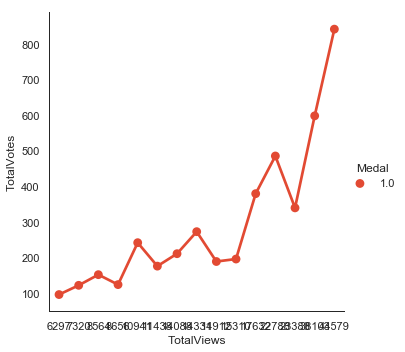

In [40]:
sns.factorplot('TotalViews','TotalVotes',hue='Medal',data=yourkernels)
plt.show()

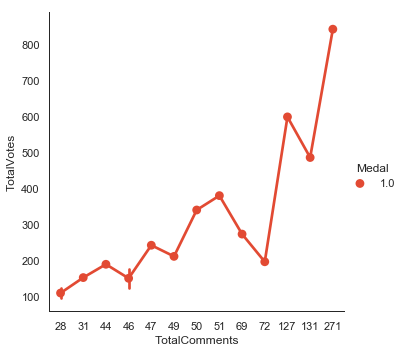

In [41]:
sns.factorplot('TotalComments','TotalVotes',hue='Medal',data=yourkernels)
plt.show()

### Histogram
We can also create a **histogram** of each input variable to get an idea of the distribution.


<Figure size 432x288 with 0 Axes>

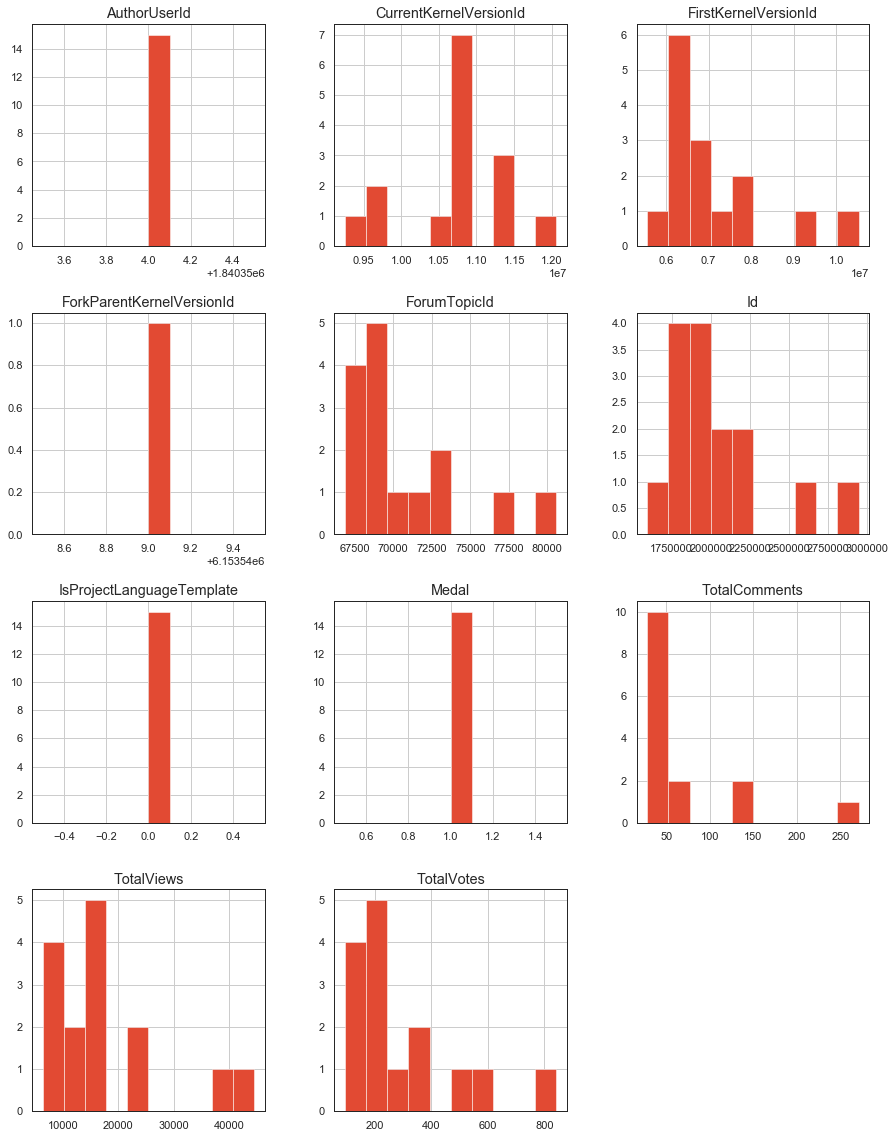

<Figure size 432x288 with 0 Axes>

In [42]:
# histograms
yourkernels.hist(figsize=(15,20))
plt.figure()

It looks like perhaps two of the input variables have a Gaussian distribution. This is useful to note as we can use algorithms that can exploit this assumption.



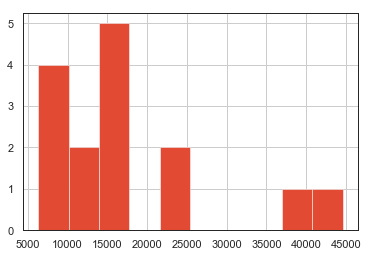

In [43]:
yourkernels["TotalViews"].hist();

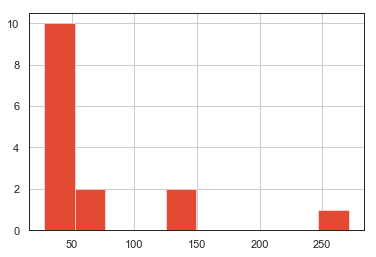

In [44]:
yourkernels["TotalComments"].hist();

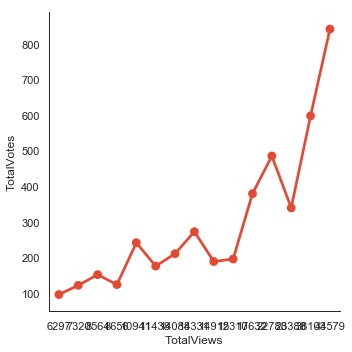

In [45]:
sns.factorplot('TotalViews','TotalVotes',data=yourkernels)
plt.show()

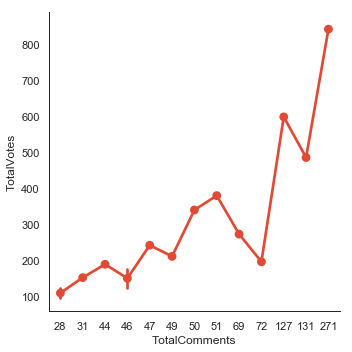

In [46]:
sns.factorplot('TotalComments','TotalVotes',data=yourkernels)
plt.show()

### violinplots

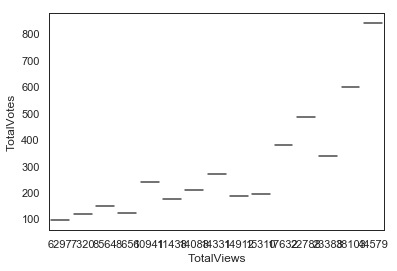

In [47]:
# violinplots on petal-length for each species
sns.violinplot(data=yourkernels,x="TotalViews", y="TotalVotes")

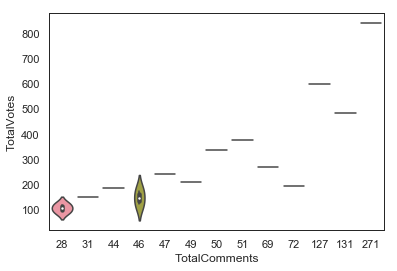

In [48]:
# violinplots on petal-length for each species
sns.violinplot(data=yourkernels,x="TotalComments", y="TotalVotes")

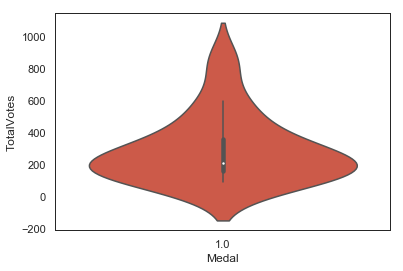

In [49]:
sns.violinplot(data=yourkernels,x="Medal", y="TotalVotes")

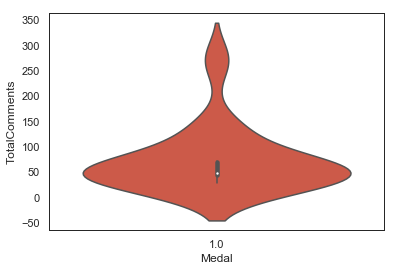

In [50]:
sns.violinplot(data=yourkernels,x="Medal", y="TotalComments")

how many NA elements in every column


###  kdeplot

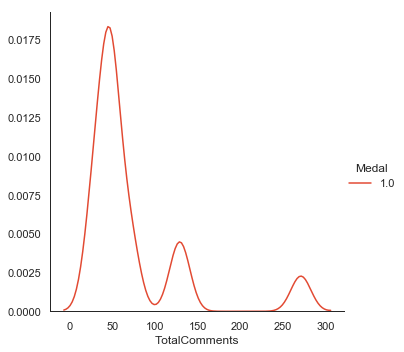

In [51]:
# seaborn's kdeplot, plots univariate or bivariate density estimates.
#Size can be changed by tweeking the value used
sns.FacetGrid(yourkernels, hue="Medal", size=5).map(sns.kdeplot, "TotalComments").add_legend()
plt.show()

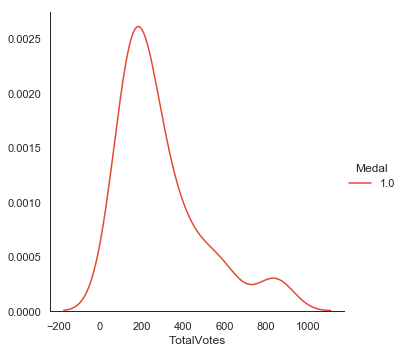

In [52]:
sns.FacetGrid(yourkernels, hue="Medal", size=5).map(sns.kdeplot, "TotalVotes").add_legend()
plt.show()

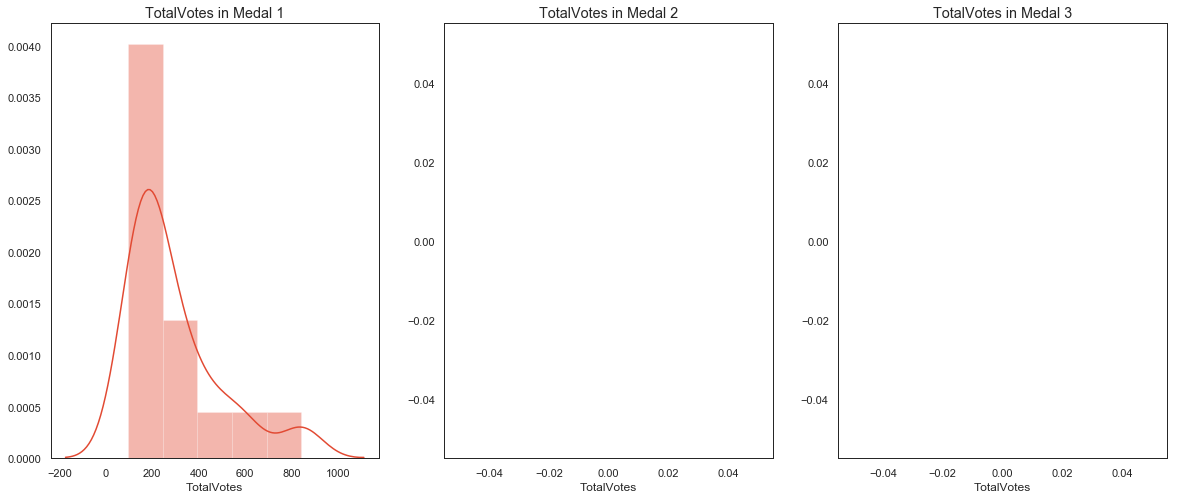

In [53]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(yourkernels[yourkernels['Medal']==1].TotalVotes,ax=ax[0])
ax[0].set_title('TotalVotes in Medal 1')
sns.distplot(yourkernels[yourkernels['Medal']==2].TotalVotes,ax=ax[1])
ax[1].set_title('TotalVotes in Medal 2')
sns.distplot(yourkernels[yourkernels['Medal']==3].TotalVotes,ax=ax[2])
ax[2].set_title('TotalVotes in Medal 3')
plt.show()

### jointplot

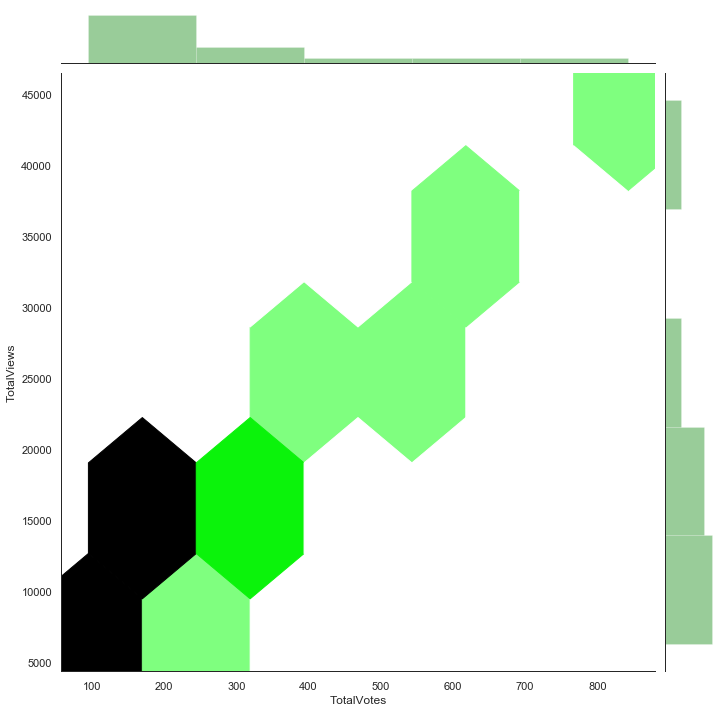

In [54]:
# Use seaborn's jointplot to make a hexagonal bin plot
#Set desired size and ratio and choose a color.
sns.jointplot(x="TotalVotes", y="TotalViews", data=yourkernels, size=10,ratio=10, kind='hex',color='green')
plt.show()

###  andrews_curves

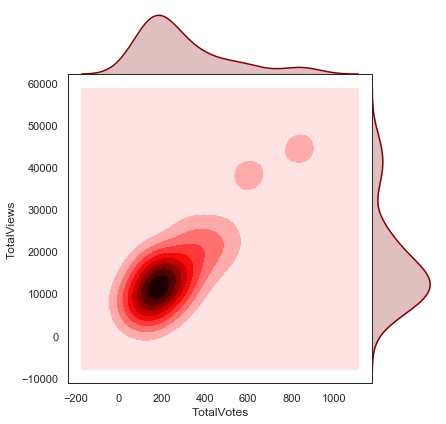

In [55]:
# we will use seaborn jointplot shows bivariate scatterplots and univariate histograms with Kernel density 
# estimation in the same figure
sns.jointplot(x="TotalVotes", y="TotalViews", data=yourkernels, size=6, kind='kde', color='#800000', space=0)

### Heatmap

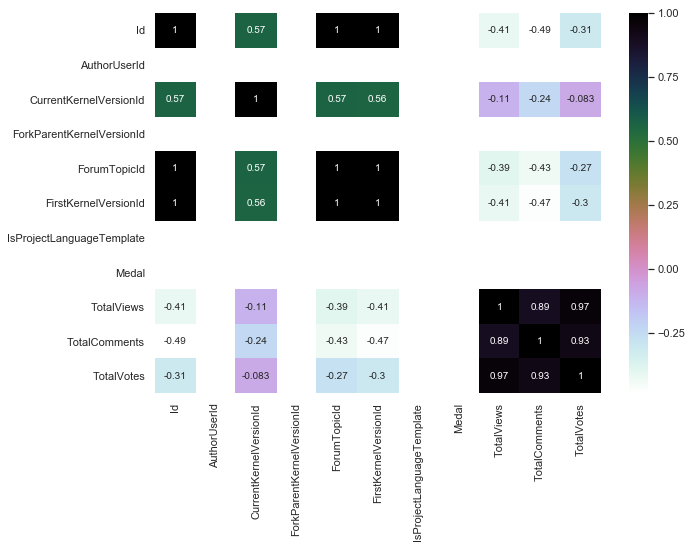

In [56]:
plt.figure(figsize=(10,7)) 
sns.heatmap(yourkernels.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

## WordCloud
It is possible that you have seen a cloud filled with lots of words in different sizes, which represent the frequency or the importance of each word. 
This is called Tag Cloud or WordCloud.

In [ ]:
import nltk
nltk.download('stopwords')
#nltk.data.LazyLoader('data/nltk_dataset/corpora/stopwords.zip')
#nltk.open('data/nltk_dataset/corpora/stopwords')

from wordcloud import WordCloud as wc
from nltk.corpus import stopwords
eng_stopwords = set(stopwords.words("english"))
messages.head(1)

In [58]:
def generate_wordcloud(text): 
    wordcloud = wc(relative_scaling = 1.0,stopwords = eng_stopwords).generate(text)
    fig,ax = plt.subplots(1,1,figsize=(10,10))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    ax.margins(x=0, y=0)
    plt.show()

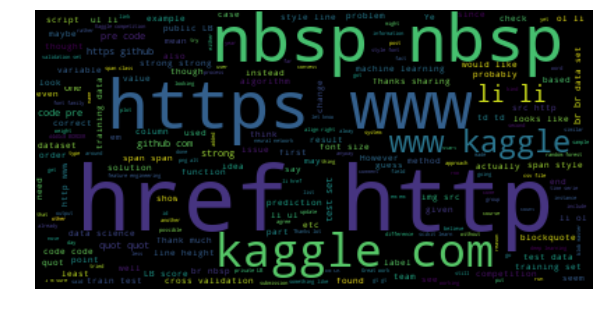

In [59]:
text=','.join(str(v) for v in messages['Message'])
#text =" ".join(messages['Message'])
generate_wordcloud(text)